In [1]:
# Setting up the environment.
import numpy as np
import pandas as pd
from scipy import stats

In [113]:
# Load the data from JHU
df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
df_d = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')

In [114]:
df.tail(3)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20
3252,84099999,US,USA,840,99999.0,NaN,Grand Princess,US,0.0,0.0,...,103,103,103,103,103,103,103,103,103,103
3253,84070004,US,USA,840,NaN,Michigan Department of Corrections (MDOC),Michigan,US,0.0,0.0,...,0,0,0,0,0,370,429,472,472,514
3254,84070005,US,USA,840,NaN,Federal Correctional Institution (FCI),Michigan,US,0.0,0.0,...,0,0,0,0,0,21,23,36,36,44


In [115]:
df_d.tail(3)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20
3252,84099999,US,USA,840,99999.0,NaN,Grand Princess,US,0.0,0.0,...,3,3,3,3,0,0,0,0,0,0
3253,84070004,US,USA,840,NaN,Michigan Department of Corrections (MDOC),Michigan,US,0.0,0.0,...,0,0,0,0,0,8,9,12,12,15
3254,84070005,US,USA,840,NaN,Federal Correctional Institution (FCI),Michigan,US,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [116]:
df = df.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2' ,'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key'], axis=1)
df_d = df_d.drop(['Population', 'UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2' ,'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key'], axis=1)

In [117]:
df.head(3)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,121,128,130,133,133,133,133,135,135,136
2,0,0,0,0,0,0,0,0,0,0,...,11,11,11,11,11,11,11,13,13,13


In [118]:
# this cell by Leaf Petersen
# Copy the data frame
dfdaily=df.copy()

# We are on the first iteration
first=True
# For every column
for column in df:
   # If this is the first iteration
   if first:
     # Save the first column
     prev = column
     # Copy over the first column unchanged
     dfdaily[column]=df[column]
     # All subsequent iterations are not the first
     first=False
     # Skip the rest of the loop
     continue
   # We are not the first iteration, so keep going
   # Set the new column contents to the difference of the
   # previous column and the current column
   dfdaily[column] = df[column]-df[prev]
   # The current column is the previous column for the next iteration
   prev = column
dfdaily.head(3)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,7,2,3,0,0,0,2,0,1
2,0,0,0,0,0,0,0,0,0,0,...,3,0,0,0,0,0,0,2,0,0


In [119]:
# this cell by Leaf Petersen
# Copy the data frame
df_d_daily=df_d.copy()

# We are on the first iteration
first=True
# For every column
for column in df_d:
   # If this is the first iteration
   if first:
     # Save the first column
     prev = column
     # Copy over the first column unchanged
     df_d_daily[column]=df_d[column]
     # All subsequent iterations are not the first
     first=False
     # Skip the rest of the loop
     continue
   # We are not the first iteration, so keep going
   # Set the new column contents to the difference of the
   # previous column and the current column
   df_d_daily[column] = df_d[column]-df_d[prev]
   # The current column is the previous column for the next iteration
   prev = column
df_d_daily.head(3)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
# We want the sum of all States and Counties to get the total value of Confirmed in the US
dfdaily = dfdaily.sum().to_frame()
dfdaily = dfdaily.reset_index()
# We want two colums named Date and Confirmed
dfdaily = dfdaily.rename(columns={'index': 'Date', 0: 'Confirmed'})
dfdaily.tail(3)

,Date,Confirmed
84,4/15/20,28680
85,4/16/20,31451
86,4/17/20,31905


In [121]:
# We want the sum of all States and Counties to get the total value of Deaths in the US
df_d_daily = df_d_daily.sum().to_frame()
df_d_daily = df_d_daily.reset_index()
# We want two colums named Date and Deaths
df_d_daily = df_d_daily.rename(columns={'index': 'Date', 0: 'Deaths'})
df_d_daily.head(3)

,Date,Deaths
0,1/22/20,0
1,1/23/20,0
2,1/24/20,0


In [123]:
# Calculating rolling average for window of 7
dfdaily_avg = dfdaily.rolling(7, win_type='triang').mean().round()
# Replacing NaNs 
dfdaily_avg.iloc[0] = [1]
dfdaily_avg = dfdaily_avg.fillna(0)
dfdaily_avg = dfdaily_avg.reset_index()
dfdaily_avg = dfdaily_avg.rename(columns={'index': 'Date'})
dfdaily_avg.head(3)

,Date,Confirmed
0,0,1.0
1,1,0.0
2,2,0.0


In [124]:
dfdaily_avg.head(3)

,Date,Confirmed
0,0,1.0
1,1,0.0
2,2,0.0


In [125]:
dfdaily_avg.tail(3)

,Date,Confirmed
84,84,29158.0
85,85,28297.0
86,86,28292.0


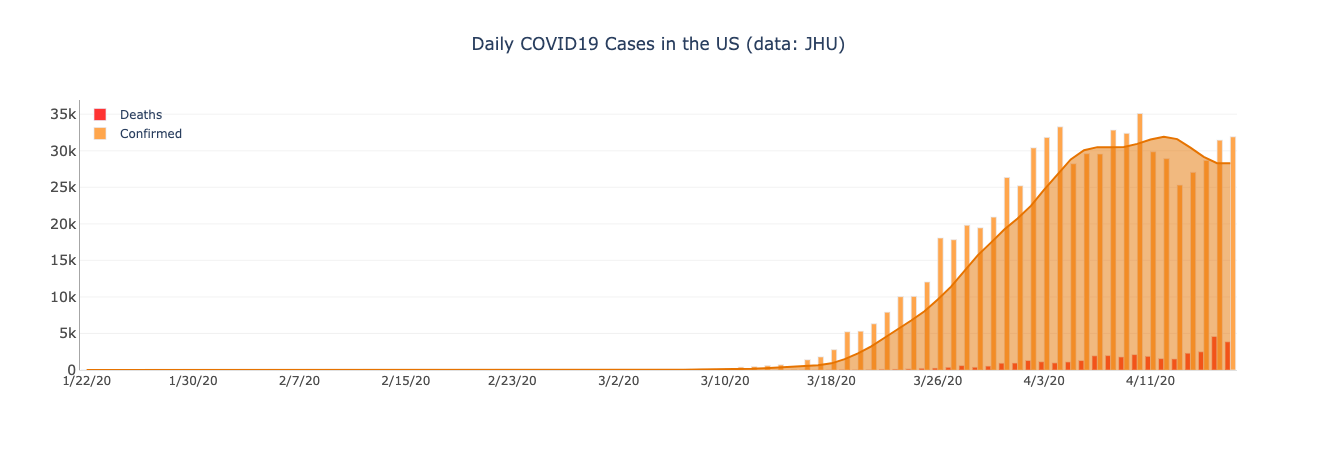

In [126]:
import plotly.graph_objects as go

# con = us_df['positive']
# dea = us_df['death']

fig = go.Figure()

fig.add_trace(go.Bar(x = df_d_daily['Date'], y = df_d_daily['Deaths'],
              #hovertext='Deaths',
              name='Deaths ',
              #opacity=.5,
              textposition='outside',
              hovertemplate = 'Deaths: <b>%{y:,.0f}</b><extra></extra>',
              marker_color='#ff3333'     
                    )
             )

fig.add_trace(go.Bar(x = dfdaily['Date'], y = dfdaily['Confirmed'],
              #hovertext='Positive cases',
              name='Confirmed ',
              textposition='outside',
              hoverlabel=dict(bgcolor='#ff8000', bordercolor='white',
                font=dict(family='Arial', size=20, color='white')
                             ),
              hovertemplate = 'Confirmed: <b>%{y:,.0f}</b><extra></extra>',
              marker_color='#ffa64d'
                    )
             )

fig.update_layout(#title=dict(text='Daily COVID19 Cases in the US (data: JHU)', x=0.5),
                  #width=1200,
                  barmode='group',
                  paper_bgcolor='rgba(0,0,0,0)', 
                  plot_bgcolor='rgba(0,0,0,0)',
                  uniformtext_minsize=7, uniformtext_mode='hide',
                  #hovermode='x', #sets the bar chart to display both tooltips by default
                  hovermode="x unified", # shows all tooltips in one box and vertical line - easier to read
                  hoverlabel=dict(
                                bgcolor="white", 
                                font_size=16, 
                                font_family="Arial",
                                bordercolor='#b3b3b3'),
                  legend=dict(x=0, y=1),
                  #font=dict(size = 12),
                  dragmode=False, #disable panning so mobile apps can receive pinch to zoom events
                  yaxis = dict(
                      scaleanchor = "x",
                      scaleratio = 1,
                              )
                 )
                 
                     
fig.update_xaxes(showline=True, linewidth=0.5, linecolor='#a6a6a6', color='#4d4d4d',
                #showgrid=True, gridwidth=1, gridcolor='#f2f2f2',
                fixedrange=True,
                #tickfont = dict(size = 10),
                tickmode='auto',
                nticks=12,
                spikethickness=0.4,
                spikedash='solid',
                )
              
fig.update_yaxes(showline=True, linewidth=1, linecolor='#a6a6a6', color='#4d4d4d',
                 showgrid=True, gridwidth=1, gridcolor='#f2f2f2',
                 fixedrange=True,
                 tickfont = dict(size = 14),
                )


fig.update_traces(texttemplate='%{y:,.2s}', textposition='outside')


    
fig.add_trace(go.Scatter(x = dfdaily['Date'], y = dfdaily_avg['Confirmed'],
                    mode='lines',
                    fill='tozeroy',
                    name='',
                    line=dict(color=' #e67300', width=2),
                    showlegend=False,
                    hoverinfo='skip'
                        )
             )


fig.show(displayModeBar=False)
    
import plotly.io as pio
pio.write_html(fig, file='Index.html', auto_open=True)